<a href="https://colab.research.google.com/github/zookeeper464/data-analysis/blob/main/section2/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **주제 부동산 시장에 대한 데이터 분석**
**분석 내용 - 수도권 부동산 투자 가치 조사**
1. 2012~2020까지의 데이터를 통해 2018의 테스트 데이터를 조사한다.(3456개)
  2020 서울지역의 (아파트,연립,단독)을 조사한다.(O)
2. 중위 가격비, 매매가격을 통해 실투자금에 대해 조사한다.(O)
3. 2년동안의 중위 가격비와 주택 담보대출 금리를 비교하여 계산값을 도출한다.(O)
4. 2년 동안 금리와 비교하여 3.의 column이 더 큰지 작은지 비교한다.(O)
5. 이를 통해 타겟을 설정하고 타겟은 투자여부로 설정한다.(O)
---
**피쳐설정**
1. 실거래지수를 통해 매매와 전세 사이의 관계 설정(O)
2. 가계대출 대비 주택 대출의 비율의 수치 설정(O)
3. 환율, 종합주가 지수, 주택 담보대출 금리, 정기 예금 금리(O)
---
**추가해야 하는 내용**

선택한 모델에 대한 이유 설명
1. 왜 해당 데이터를 선택했는지 자세히 설명한다.(O)
2. 가설은 쓸모 있어야 한다.(O)
3. 해당 특성을 target으로 지정한 이유를 설명하세요.(O)
4. 해당 베이스라인 모델과 평가지표를 선택한 이유를 설명하세요.(O)
5. 만들고자 하는 모델의 한계와 모델의 목표 설명하세요.(O)
6. Data Leakage가 있었나요? 없었다면 어떻게 방지했나요?(O)
7. 김하진님이 만들고자 하는 모델은 언제 유용한가요? 어떤 한계를 가지고 있나요?(O)

모델 학습과 관련한 내용
8. 다양한 모델을 학습하세요. (O)
9. 평가지표를 계산 후 베이스라인과 비교해보세요.(O)
10. 어느정도 성능이 나왔다면, 교차 검증 (이하 CV)을 통해서 일반화될 가능성이 있는지 확인해봅니다.(O)
11. 최소 2개 이상의 모델을 만들어서 validation 점수를 보고하세요.(O)
12. 최종 모델의 test 점수를 보고하세요.(O)

모델 검증에 대한 내용
13. 모델을 학습한 후에 베이스라인보다 잘 나왔나요? 그렇지 않다면 그 이유는 무엇일까요?(O)
14. 모델 성능 개선을 위해 어떤 방법을 적용했나요? 그 방법을 선택한 이유는 무엇인가요?(O)
15. 최종 모델에 관해 설명하세요.(O)

발표에 대한 내용
16. PDP, SHAP을 활용하여 최종 모델을 설명합니다.()
17. 시각화는 "설명"이 제일 중요합니다.()
18. 모델이 관측치를 예측하기 위해서 어떤 특성을 활용했나요?()
19. 어떤 특성이 있다면 모델의 예측에 도움이 될까요? 해당 특성은 어떻게 구할 수 있을까요?()
---
**발표내용**

지금까지 학습한 내용을 토대로 주택 투자에 대한 이익에 대해서 설명하고 앞으로 변화할 주택 시장에 대해서 발표한다.()

## 기존의 데이터를 가지고 온 뒤 새롭게 전처리 하는 과정을 거친다.

In [1]:
import pandas as pd


매매대비전세_단독 = pd.read_excel("/content/매매가격대비전세가격_중위가격_단독.xlsx")
매매대비전세_아파트 = pd.read_excel("/content/매매가격대비전세가격_중위가격_아파트.xlsx")
매매대비전세_연립다세대 = pd.read_excel("/content/매매가격대비전세가격_중위가격_연립다세대.xlsx")
매매대비전세_종합 = pd.read_excel("/content/매매가격대비전세가격_중위가격_종합.xlsx")

매매가격지수_단독 = pd.read_excel("/content/월간_매매가격지수_단독.xlsx")
매매가격지수_아파트 = pd.read_excel("/content/월간_매매가격지수_아파트.xlsx")
매매가격지수_연립다세대 = pd.read_excel("/content/월간_매매가격지수_연립다세대.xlsx")
매매가격지수_종합 = pd.read_excel("/content/월간_매매가격지수_종합.xlsx")
#매매가격지수는 변동율을 제거하는 전처리를 해야한다.

정기예금금리 = pd.read_excel("/content/정기예금금리.xlsx")
종합주가지수 = pd.read_excel("/content/종합주가지수.xlsx")
주택담보대출금리 = pd.read_excel("/content/주택담보대출금리.xlsx")
주택대출 = pd.read_excel("/content/주택대출.xlsx")
가계대출 = pd.read_excel("/content/가계대출.xlsx")
환율 = pd.read_excel("/content/환율.xlsx")

In [2]:
def organized (df):
  df_t = df.transpose()
  return df_t[df_t[0] != "변동률"]

매매가격지수_단독_t = organized(매매가격지수_단독).reset_index()
매매가격지수_아파트_t = organized(매매가격지수_아파트).reset_index()
매매가격지수_연립다세대_t = organized(매매가격지수_연립다세대).reset_index()
매매가격지수_종합_t = organized(매매가격지수_종합).reset_index()
# 매매가격지수에 들어가 있는 변동률 제거 및 트랜스포즈, reset_index

매매가격지수_단독_t.columns=["년월", "val","서울",	'강북지역',	'도심권',	'동북권',	'서북권',	'강남지역',	'서남권',	"동남권"]
매매가격지수_단독_n = 매매가격지수_단독_t.drop(매매가격지수_단독_t.index[0]).drop("val", axis=1)
매매가격지수_아파트_t.columns=["년월", "val","서울",	'강북지역',	'도심권',	'동북권',	'서북권',	'강남지역',	'서남권',	"동남권"]
매매가격지수_아파트_n = 매매가격지수_아파트_t.drop(매매가격지수_아파트_t.index[0]).drop("val", axis=1)
매매가격지수_연립다세대_t.columns=["년월", "val","서울",	'강북지역',	'도심권',	'동북권',	'서북권',	'강남지역',	'서남권',	"동남권"]
매매가격지수_연립다세대_n = 매매가격지수_연립다세대_t.drop(매매가격지수_연립다세대_t.index[0]).drop("val", axis=1)
매매가격지수_종합_t.columns=["년월", "val","서울",	'강북지역',	'도심권',	'동북권',	'서북권',	'강남지역',	'서남권',	"동남권"]
매매가격지수_종합_n = 매매가격지수_종합_t.drop(매매가격지수_종합_t.index[0]).drop("val", axis=1)
#columns와 index를 사용하기 좋게 통일시켰다.

매매가격지수_단독_tidy = pd.melt(매매가격지수_단독_n,["년월"],var_name="지역",value_name="매매가격지수")
매매가격지수_아파트_tidy = pd.melt(매매가격지수_아파트_n,["년월"],var_name="지역",value_name="매매가격지수")
매매가격지수_연립다세대_tidy = pd.melt(매매가격지수_연립다세대_n,["년월"],var_name="지역",value_name="매매가격지수")
매매가격지수_종합_tidy = pd.melt(매매가격지수_종합_n,["년월"],var_name="지역",value_name="매매가격지수")

매매가격지수_단독_tidy["종류"] = "단독"
매매가격지수_아파트_tidy["종류"] = "아파트"
매매가격지수_연립다세대_tidy["종류"] = "연립다세대"
매매가격지수_종합_tidy["종류"] = "종합"
#통일시킨 데이터를 가지고 tidy형태로 변형시켰다.

In [3]:
매매대비전세_단독_t =매매대비전세_단독.T.reset_index()
매매대비전세_아파트_t = 매매대비전세_아파트.T.reset_index()
매매대비전세_연립다세대_t = 매매대비전세_연립다세대.T.reset_index()
매매대비전세_종합_t = 매매대비전세_종합.T.reset_index()

정기예금금리_t = 정기예금금리.T.reset_index()
종합주가지수_t = 종합주가지수.T.reset_index()
주택담보대출금리_t = 주택담보대출금리.T.reset_index()
주택대출_t = 주택대출.T.reset_index()
가계대출_t = 가계대출.T.reset_index()
환율_t = 환율.T.reset_index()
#나머지 특성들에게 트랜스포즈 및 reset_index

매매대비전세_단독_t.columns = ["년월","서울",	'강북지역',	'도심권',	'동북권',	'서북권',	'강남지역',	'서남권',	"동남권"]
매매대비전세_아파트_t.columns = ["년월","서울",	'강북지역',	'도심권',	'동북권',	'서북권',	'강남지역',	'서남권',	"동남권"]
매매대비전세_연립다세대_t.columns = ["년월","서울",	'강북지역',	'도심권',	'동북권',	'서북권',	'강남지역',	'서남권',	"동남권"]
매매대비전세_종합_t.columns = ["년월","서울",	'강북지역',	'도심권',	'동북권',	'서북권',	'강남지역',	'서남권',	"동남권"]
매매대비전세_단독_t = 매매대비전세_단독_t.drop(매매대비전세_단독_t.index[0])
매매대비전세_아파트_t = 매매대비전세_아파트_t.drop(매매대비전세_아파트_t.index[0])
매매대비전세_연립다세대_t = 매매대비전세_연립다세대_t.drop(매매대비전세_연립다세대_t.index[0])
매매대비전세_종합_t = 매매대비전세_종합_t.drop(매매대비전세_종합_t.index[0])

정기예금금리_t.columns = ["년월","정기예금금리"]
종합주가지수_t.columns = ["년월","종합주가지수"]
주택담보대출금리_t.columns = ["년월", "주택담보대출금리"]
주택대출_t.columns = ["년월", "주택대출"]
가계대출_t.columns = ["년월", '가계대출']
환율_t.columns = ["년월", "환율"]
정기예금금리_t = 정기예금금리_t.drop(정기예금금리_t.index[0])
종합주가지수_t = 종합주가지수_t.drop(종합주가지수_t.index[0])
주택담보대출금리_t = 주택담보대출금리_t.drop(주택담보대출금리_t.index[0])
주택대출_t = 주택대출_t.drop(주택대출_t.index[0])
가계대출_t = 가계대출_t.drop(가계대출_t.index[0])
환율_t = 환율_t.drop(환율_t.index[0])
#columns와 index를 사용하기 좋게 통일시켰다.

매매대비전세_단독_tidy = pd.melt(매매대비전세_단독_t,["년월"],var_name="지역",value_name="매매대비전세")
매매대비전세_아파트_tidy = pd.melt(매매대비전세_아파트_t,["년월"],var_name="지역",value_name="매매대비전세")
매매대비전세_연립다세대_tidy = pd.melt(매매대비전세_연립다세대_t,["년월"],var_name="지역",value_name="매매대비전세")
매매대비전세_종합_tidy = pd.melt(매매대비전세_종합_t,["년월"],var_name="지역",value_name="매매대비전세")
매매대비전세_단독_tidy["종류"] = "단독"
매매대비전세_아파트_tidy["종류"] = "아파트"
매매대비전세_연립다세대_tidy["종류"] = "연립다세대"
매매대비전세_종합_tidy["종류"] = "종합"
#통일시킨 데이터를 가지고 tidy형태로 변형시켰다.

In [4]:
매매대비전세_종합_tidy

,년월,지역,매매대비전세,종류
0,2012년 01월,서울,52.9199,종합
1,2012년 02월,서울,53.0407,종합
2,2012년 03월,서울,53.1389,종합
3,2012년 04월,서울,53.198,종합
4,2012년 05월,서울,53.2595,종합
...,...,...,...,...
859,2020년 08월,동남권,55.772,종합
860,2020년 09월,동남권,55.9273,종합
861,2020년 10월,동남권,56.2656,종합
862,2020년 11월,동남권,56.6645,종합


In [5]:
df1 = pd.concat([매매가격지수_종합_tidy,매매가격지수_아파트_tidy,매매가격지수_연립다세대_tidy,매매가격지수_단독_tidy]).sort_values(by=['년월',"종류"], axis=0)
df1 = df1[['년월', '지역', '종류', '매매가격지수']]
df1 = df1.reset_index().drop("index",axis=1)

df2 = pd.concat([매매대비전세_종합_tidy,매매대비전세_아파트_tidy,매매대비전세_연립다세대_tidy,매매대비전세_단독_tidy]).sort_values(by=['년월',"종류"], axis=0)
df2 = df2[['년월', '지역', '종류', '매매대비전세']]
df2 = df2.reset_index().drop("index",axis=1)
# 종류에 따른 분류가 필요한 데이터들을 모두 concat으로 처리했다.

df3 = pd.merge(df1,df2)
df3


,년월,지역,종류,매매가격지수,매매대비전세
0,2012년 01월,서울,단독,96.454,41.6014
1,2012년 01월,강북지역,단독,96.404,41.8163
2,2012년 01월,도심권,단독,94.96,37.6289
3,2012년 01월,동북권,단독,96.554,41.5802
4,2012년 01월,서북권,단독,96.967,45.082
...,...,...,...,...,...
3451,2020년 12월,동북권,종합,110.336,62.9605
3452,2020년 12월,서북권,종합,111.437,62.991
3453,2020년 12월,강남지역,종합,111.273,61.4538
3454,2020년 12월,서남권,종합,110.619,64.7898


In [6]:
#정기예금금리_t, 종합주가지수_t, 주택담보대출금리_t, 주택대출_t, 가계대출_t, 환율_t
df4 = pd.merge(정기예금금리_t,종합주가지수_t,)
df5 = pd.merge(주택담보대출금리_t,환율_t)
df5["가계대출대비주택대출"] = 주택대출_t["주택대출"]/가계대출_t["가계대출"]
df6 = pd.merge(df4,df5)
df7 = pd.merge(df6,환율_t)
df7.iloc[0,5] = 128780/200857
df8 = pd.merge(df3,df7)
df8["년월"] = pd.to_datetime(df8['년월'], format="%Y년 %m월")
df8
#데이터를 모두 취합

,년월,지역,종류,매매가격지수,매매대비전세,정기예금금리,종합주가지수,주택담보대출금리,환율,가계대출대비주택대출
0,2012-01-01,서울,단독,96.454,41.6014,3.76,1891.01,5.06,1125,0.641153
1,2012-01-01,강북지역,단독,96.404,41.8163,3.76,1891.01,5.06,1125,0.641153
2,2012-01-01,도심권,단독,94.96,37.6289,3.76,1891.01,5.06,1125,0.641153
3,2012-01-01,동북권,단독,96.554,41.5802,3.76,1891.01,5.06,1125,0.641153
4,2012-01-01,서북권,단독,96.967,45.082,3.76,1891.01,5.06,1125,0.641153
...,...,...,...,...,...,...,...,...,...,...
3451,2020-12-01,동북권,종합,110.336,62.9605,0.89,2755.77,2.59,1088,0.588427
3452,2020-12-01,서북권,종합,111.437,62.991,0.89,2755.77,2.59,1088,0.588427
3453,2020-12-01,강남지역,종합,111.273,61.4538,0.89,2755.77,2.59,1088,0.588427
3454,2020-12-01,서남권,종합,110.619,64.7898,0.89,2755.77,2.59,1088,0.588427


# 데이터를 저장, 필요한 데이터 처리하고, 새로운 파일을 받아 train과 test 데이터로 구분

In [ ]:
#df8.to_excel(excel_writer='raw_proj_df.xlsx')

In [7]:
df = pd.read_excel("/content/proj_df.xlsx")
sub_df = df.drop(["Unnamed: 0",'2년 뒤 매매가격지수', '2년간 금리', '2년간 금리.1','판단여부'],axis=1)
df = df.drop(["Unnamed: 0",'2년 뒤 매매가격지수', '2년간 금리', '2년간 금리.1','손익분기점'],axis=1)

In [8]:
con1 = (df['년월'] < '2018-01-01')
con2 = (df['년월'] >= '2019-01-01')
con3 = ((df['년월'] < '2019-01-01') & (df['년월'] >= '2018-01-01'))

train = df.loc[con1]
test = df.loc[con2]
val = df.loc[con3]

target = '판단여부'
features = train.columns.drop([target])

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

X_train_encoded = pd.get_dummies(X_train).drop("년월",axis=1)
X_test_encoded = pd.get_dummies(X_test).drop("년월",axis=1)
X_val_encoded = pd.get_dummies(X_val).drop("년월",axis=1)

#발표를 위한 주석
**해당 데이터를 선택한 이유** : 대략적인 부동산 투자 흐름에 대해서 파악하고 향후 부동산 시장의 흐름이 어떻게 바뀔지 예측하기 위해서 해당 데이터를 사용했습니다. 이 데이터를 가지고 서울의 어느 지역, 어느 지역, 어느 종류의 매물이 투자가지가 더 높은지 파악할 수 있다고 생각합니다.

**target 특성을 선택한 이유** : target특성은 제가 만든 데이터로 해당 데이터는 2년 뒤의 매물의 가격과 현재 매물 가격의 차이와 해당 기간의 대출 금리를 통해 대출한 돈으로 매물을 구매하고 전세를 놓았을 때, 추가로 지출되는 이자와 지가의 변동을 파악하고 이를 해당 기간의 금리와 비교하여 더 수익이 높은지 판단하는 내용입니다. 2년 뒤의 데이터를 가지고 있을 때만 나올 수 있는 특성을 사용하여 2년 뒤의 내용이 없어도 판단할 수 있는 모델을 만들고자 하였습니다.

**베이스라인 모델과 평가지표를 선택한 이유** : 베이스라인은 1, 즉 투자하는 것으로 선택했습니다. 타겟 특성의 최빈값이 1이기 때문입니다. 또한 평가지표는 recall값을 활용했습니다. 투자한 매물에 대한 투자가치가 중요하기 때문입니다.

**만들고자 하는 모델의 한계, 데이터 누수, 장점, 목표** : 모델은 2년동안의 부동산 매물의 가격과 금리, 등의 데이터를 가지고 만들지만 실제로 2년 뒤의 상황을 알 수 없다는 한계가 있습니다. 이 모델이 가지고 있는 장점은 투자자의 시간을 단축시켜준다는 것에 있습니다. 보다 좋은 매물이 있는 지역과 시기를 추측하여 인력이 좀 더 효율적으로 쓰일 수 있도록 돕는 역할을 합니다. 이 모델의 목표는 현재 가지고 있는 정보를 토대로 2년 뒤 상황에 대해서 추측하는 것입니다.

# CV처리단계

In [ ]:
#!pip install category_encoders

In [ ]:
from category_encoders import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier


from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

## baseline score

In [11]:
print(y_train.value_counts(normalize=True), y_val.value_counts(normalize=True), sep="\n")

1.0    0.585938
0.0    0.414062
Name: 판단여부, dtype: float64
1.0    0.804688
0.0    0.195312
Name: 판단여부, dtype: float64


In [12]:
y_pred_train_base = [1]*len(y_train)
y_pred_val_base = [1]*len(y_val)

recall_train_base = 0.585938
precision_train_base = 1
recall_train_base, precision_train_base

recall_val_base = 0.804688
precision_val_base = 1
recall_val_base, precision_val_base

(0.804688, 1)

##xgboosts 모델 score

In [ ]:
model_xgb = XGBClassifier(n_estimators=300,random_state=42)

eval_set = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

model_xgb.fit(X_train_encoded, y_train, eval_set=eval_set,eval_metric='error',early_stopping_rounds=100)

In [32]:
y_pred_xgbc = model_xgb.predict(X_val_encoded)
mae = mean_absolute_error(y_val, y_pred_xgbc)
print(f'테스트 MAE: {mae:,.7f}')

temp1 = pd.DataFrame(y_val).reset_index().drop("index",axis=1)
temp2 = pd.DataFrame(y_pred_xgbc)
temp = pd.concat([temp1,temp2],axis=1)
temp3 = pd.DataFrame(temp.value_counts())
temp3

테스트 MAE: 0.1484375


0
판단여부 0       
1.0  1.0  309
0.0  1.0   57
     0.0   18

In [33]:
tp = temp3.loc[1].loc[1][0]
fp = temp3.loc[1].loc[0][0]
tn = temp3.loc[0].loc[0][0]
try:
  fn = temp3.loc[0].loc[1][0]
except:
  fn = 0
recall_xgb = tp/(fp+tp)
precision_xgb = tp/(fn+tp)
recall_xgb, precision_xgb

(0.8442622950819673, 1.0)

In [34]:
y_pred_xgbc = model_xgb.predict(X_train_encoded)
mae = mean_absolute_error(y_train, y_pred_xgbc)
print(f'테스트 MAE: {mae:,.7f}')

temp1 = pd.DataFrame(y_train).reset_index().drop("index",axis=1)
temp2 = pd.DataFrame(y_pred_xgbc)
temp = pd.concat([temp1,temp2],axis=1)
pd.DataFrame(temp.value_counts())

테스트 MAE: 0.0217014


0
판단여부 0        
1.0  1.0  1336
0.0  0.0   918
     1.0    36
1.0  0.0    14

In [35]:
scores_xgb = cross_val_score(model_xgb, X_train_encoded, y_train, cv=10, scoring='recall')
scores_xgb.mean(), scores_xgb.std()

(0.8422222222222222, 0.28021253936139884)

##randomforesst 모델 score

In [13]:
pipe = make_pipeline(
    SimpleImputer(), 
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)

dists = {  
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': randint(50, 300), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, 50], 
    'randomforestclassifier__max_features': uniform(0, 1)
}

model_rf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

model_rf.fit(X_train_encoded, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   58.1s finished


In [14]:
print('최적 하이퍼파라미터: ', model_rf.best_params_)
print('MAE: ', -model_rf.best_score_)

최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.03694917757273897, 'randomforestclassifier__n_estimators': 159, 'simpleimputer__strategy': 'median'}
MAE:  0.30295138888888884


In [15]:
best_model_rf = model_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_val_encoded)
mae = mean_absolute_error(y_val, y_pred_rf)
print(f'테스트 MAE: {mae:,.7f}')

temp1 = pd.DataFrame(y_val).reset_index().drop("index",axis=1)
temp2 = pd.DataFrame(y_pred_rf)
temp = pd.concat([temp1,temp2],axis=1)
temp3 = pd.DataFrame(temp.value_counts())
temp3

테스트 MAE: 0.1614583


0
판단여부 0       
1.0  1.0  309
0.0  1.0   62
     0.0   13

In [16]:
tp = temp3.loc[1].loc[1][0]
fp = temp3.loc[1].loc[0][0]
tn = temp3.loc[0].loc[0][0]
try:
  fn = temp3.loc[0].loc[1][0]
except:
  fn = 0
recall_rf = tp/(fp+tp)
precision_rf = tp/(fn+tp)
recall_rf, precision_rf

(0.8328840970350404, 1.0)

In [17]:
y_pred_rf = best_model_rf.predict(X_train_encoded)
mae = mean_absolute_error(y_train, y_pred_rf)
print(f'테스트 MAE: {mae:,.7f}')

temp1 = pd.DataFrame(y_train).reset_index().drop("index",axis=1)
temp2 = pd.DataFrame(y_pred_rf)
temp = pd.concat([temp1,temp2],axis=1)
pd.DataFrame(temp.value_counts())

테스트 MAE: 0.0078125


0
판단여부 0        
1.0  1.0  1350
0.0  0.0   936
     1.0    18

In [18]:
scores_rf = cross_val_score(best_model_rf, X_train_encoded, y_train, cv=10, scoring='recall')
scores_rf.mean(), scores_rf.std()

(0.8777777777777779, 0.28142787013822024)

In [36]:
recall_rf, recall_xgb, scores_rf.mean(), scores_xgb.mean()

(0.8328840970350404,
 0.8442622950819673,
 0.8777777777777779,
 0.8422222222222222)

#발표를 위한 주석
**val_평가지표** : 베이스라인에서 계산한 recall값은 0.804688이고 생성한 모델에서 나온 recall값은 XGBClassifier : 0.8442622950819673이고, RandomForestClassifier : 0.8328840970350404이므로 기존의 베이스라인 모델보다 더 향상된 정확도를 가진다.

**교차 검증** : 교차 검증 결과로 recall값은 RandomForestClassifier : 0.8777777777777779이고, XGBClassifier : 0.8422222222222222이므로 RandomForestClassifier가 XGBClassifier보다 더 높은 정확도를 가진다고 볼 수 있다. 즉 더 다양한 상황에서 RandomForestClassifier가 더 정확한 값을 추측한다고 볼 수 있다.

주어진 모델을 가지고 2019~2020년의 투자가치 있는 부동산 추정

In [ ]:
y_pred_rf_df = pd.DataFrame(y_pred_rf, columns=["판단여부"])
check_rf = pd.concat([test[["년월","지역","종류"]].reset_index().drop(["index"],axis=1),y_pred_rf_df],axis=1)
check_rf[check_rf["판단여부"]==0.0]

,년월,지역,종류,판단여부
21,2019-01-01,강남지역,연립다세대,0.0
22,2019-01-01,서남권,연립다세대,0.0
53,2019-02-01,강남지역,연립다세대,0.0
54,2019-02-01,서남권,연립다세대,0.0
85,2019-03-01,강남지역,연립다세대,0.0
86,2019-03-01,서남권,연립다세대,0.0
117,2019-04-01,강남지역,연립다세대,0.0
118,2019-04-01,서남권,연립다세대,0.0
149,2019-05-01,강남지역,연립다세대,0.0
150,2019-05-01,서남권,연립다세대,0.0


추정결과 연립다세대주택을 제외한 모든 부동산은 이득이라 추측한다.

모델을 학습한 후에 베이스라인보다 잘 나왔나요? 그렇지 않다면 그 이유는 무엇일까요?()
모델 성능 개선을 위해 어떤 방법을 적용했나요? 그 방법을 선택한 이유는 무엇인가요?()
최종 모델에 관해 설명하세요.()

# 추가로 투자하는 부동산 중 어느 지역, 어떤 매물이 더 유리한지 조사해 보았다.

In [186]:
con1 = (sub_df['년월'] < '2018-01-01')
con2 = (sub_df['년월'] >= '2019-01-01')
con3 = ((sub_df['년월'] < '2019-01-01') & (sub_df['년월'] >= '2018-01-01'))

train = sub_df.loc[con1]
test = sub_df.loc[con2]
val = sub_df.loc[con3]

target = '손익분기점'
features = train.columns.drop([target])

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

X_train_encoded = pd.get_dummies(X_train).drop("년월",axis=1)
X_test_encoded = pd.get_dummies(X_test).drop("년월",axis=1)
X_val_encoded = pd.get_dummies(X_val).drop("년월",axis=1)

In [187]:
pipe = make_pipeline(
    SimpleImputer(), 
    StandardScaler(),
    RandomForestRegressor(random_state=42)
)

dists = {  
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 300), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, 50], 
    'randomforestregressor__max_features': uniform(0, 1)
}

model = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

model.fit(X_train_encoded, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.6min finished


In [39]:
print('최적 하이퍼파라미터: ', model.best_params_)
print('MAE: ', -model.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 0.6968174378171399, 'randomforestregressor__n_estimators': 163, 'simpleimputer__strategy': 'median'}
MAE:  0.0415585268191282


In [48]:
best_model = model.best_estimator_
y_pred = best_model.predict(X_val_encoded)
mae = mean_absolute_error(y_val, y_pred)
print(f'테스트 MAE: {mae:,.7f}')

테스트 MAE: 0.0172593


In [67]:
temp1 = pd.DataFrame(y_val).reset_index().drop("index",axis=1)
temp2 = pd.DataFrame(y_pred)
temp = pd.concat([temp1,temp2],axis=1)
temp

,손익분기점,0
0,0.081410,0.064451
1,0.081077,0.065001
2,0.099601,0.077672
3,0.074912,0.062327
4,0.085434,0.066372
...,...,...
379,0.023140,0.015790
380,0.018031,0.020259
381,0.013010,0.021039
382,0.019322,0.017698


In [70]:
val.head()

,년월,지역,종류,매매가격지수,매매대비전세,정기예금금리,종합주가지수,주택담보대출금리,환율,가계대출대비주택대출,손익분기점
2304,2018-01-01,서울,단독,100.721,54.336399,1.76,2520.94,3.47,1071.5,0.626653,0.081410
2305,2018-01-01,강북지역,단독,100.785,56.077452,1.76,2520.94,3.47,1071.5,0.626653,0.081077
2306,2018-01-01,도심권,단독,100.931,43.859649,1.76,2520.94,3.47,1071.5,0.626653,0.099601
2307,2018-01-01,동북권,단독,100.765,59.475625,1.76,2520.94,3.47,1071.5,0.626653,0.074912
2308,2018-01-01,서북권,단독,100.737,55.265296,1.76,2520.94,3.47,1071.5,0.626653,0.085434


In [80]:
y_pred = best_model.predict(X_val_encoded)
y_pred = pd.DataFrame(y_pred, columns=["손익분기점예상"])
index_val = pd.concat([val[["년월","지역","종류","손익분기점"]].reset_index().drop(["index"],axis=1),y_pred],axis=1)
index_val[((index_val["손익분기점"]<=0) & (index_val["손익분기점예상"]>=0.01))]

,년월,지역,종류,손익분기점,손익분기점예상
210,2018-07-01,도심권,연립다세대,-0.004170,0.012006
242,2018-08-01,도심권,연립다세대,-0.006617,0.011814
271,2018-09-01,동남권,아파트,-0.002605,0.069981
273,2018-09-01,강북지역,연립다세대,-0.000291,0.010300
274,2018-09-01,도심권,연립다세대,-0.008676,0.012156
303,2018-10-01,동남권,아파트,-0.007207,0.058975
319,2018-10-01,동남권,종합,-0.002548,0.031524
335,2018-11-01,동남권,아파트,-0.004464,0.058372
351,2018-11-01,동남권,종합,-0.000782,0.030151


In [89]:
index_val[((index_val["지역"]=="동남권") & (index_val["종류"]=="아파트") &(index_val["손익분기점"]>=0))]

,년월,지역,종류,손익분기점,손익분기점예상
15,2018-01-01,동남권,아파트,0.063966,0.075735
47,2018-02-01,동남권,아파트,0.034027,0.067882
79,2018-03-01,동남권,아파트,0.021194,0.073875
111,2018-04-01,동남권,아파트,0.012130,0.068925
143,2018-05-01,동남권,아파트,0.007183,0.068782
175,2018-06-01,동남권,아파트,0.011513,0.065317
207,2018-07-01,동남권,아파트,0.025464,0.069961
239,2018-08-01,동남권,아파트,0.021650,0.070613
367,2018-12-01,동남권,아파트,0.003426,0.056604


In [84]:
y_pred = best_model.predict(X_test_encoded)
y_pred = pd.DataFrame(y_pred, columns=["손익분기점예상"])
index_test = pd.concat([test[["년월","지역","종류"]].reset_index().drop(["index"],axis=1),y_pred],axis=1)
index_test[index_test["손익분기점예상"]>=0.07]

,년월,지역,종류,손익분기점예상
431,2020-02-01,동남권,아파트,0.071161
527,2020-05-01,동남권,아파트,0.071331
557,2020-06-01,강남지역,아파트,0.070296
559,2020-06-01,동남권,아파트,0.072304
591,2020-07-01,동남권,아파트,0.071783
623,2020-08-01,동남권,아파트,0.071839
655,2020-09-01,동남권,아파트,0.071839
685,2020-10-01,강남지역,아파트,0.070121
687,2020-10-01,동남권,아파트,0.071895
717,2020-11-01,강남지역,아파트,0.071532


In [ ]:
index_test.sort_values("손익분기점예상").tail(50)

투자가치가 높은 매물은 아파트로 결론이 나왔으며 지역으로는 동남권, 강남지역, 서남권 순으로 나왔다.
하지만 동남권 아파트의 경우검증 데이터에서 실제와 차이가 크게 나온 부분이 많다는 부분에서 신뢰하기 어렵다.

In [ ]:
index_test.sort_values("손익분기점예상").head(50)

앞에서 나왔던 결론과 마찬가지로 연립다세대 주택은 모든 지역에서 투자가치가 낮은 매물이라는 결론이 나왔다.

# 시각화 자료들

In [188]:
X_test_encoded.columns

Index(['매매가격지수', '매매대비전세', '정기예금금리', '종합주가지수', '주택담보대출금리', '환율', '가계대출대비주택대출',
       '지역_강남지역', '지역_강북지역', '지역_도심권', '지역_동남권', '지역_동북권', '지역_서남권', '지역_서북권',
       '지역_서울', '종류_단독', '종류_아파트', '종류_연립다세대', '종류_종합'],
      dtype='object')

In [198]:
X_test_encoded_en = pd.DataFrame(X_test_encoded)
X_test_encoded_en.columns=['sales_point', 'sale_borrow_rate', 'interest_rate', 'stock', 'mortgage_loan_rate', 'exchange_rate', 
                           'household_mortgage_loan_rate','gangnam', 'gangbuk', 'downtown', 'southeast ', 'northeast', 'southwest', 'northwest', 'seoul',
                           'house', 'apartment', 'house_multi_family', 'house_comprehensive']

X_train_encoded_en = pd.DataFrame(X_train_encoded)
X_train_encoded_en.columns=['sales_point', 'sale_borrow_rate', 'interest_rate', 'stock', 'mortgage_loan_rate', 'exchange_rate', 
                           'household_mortgage_loan_rate','gangnam', 'gangbuk', 'downtown', 'southeast ', 'northeast', 'southwest', 'northwest',
                           'seoul', 'house', 'apartment', 'house_multi_family', 'house_comprehensive']

X_val_encoded_en = pd.DataFrame(X_val_encoded)
X_val_encoded_en.columns=['sales_point', 'sale_borrow_rate', 'interest_rate', 'stock', 'mortgage_loan_rate', 'exchange_rate', 
                           'household_mortgage_loan_rate','gangnam', 'gangbuk', 'downtown', 'southeast ', 'northeast', 'southwest', 'northwest',
                           'seoul', 'house', 'apartment', 'house_multi_family', 'house_comprehensive']

In [199]:
X_train_encoded_en.head()

,sales_point,sale_borrow_rate,interest_rate,stock,mortgage_loan_rate,exchange_rate,household_mortgage_loan_rate,gangnam,gangbuk,downtown,southeast,northeast,southwest,northwest,seoul,house,apartment,house_multi_family,house_comprehensive
0,96.454,41.601373,3.76,1891.01,5.06,1125.0,0.641153,0,0,0,0,0,0,0,1,1,0,0,0
1,96.404,41.816322,3.76,1891.01,5.06,1125.0,0.641153,0,1,0,0,0,0,0,0,1,0,0,0
2,94.960,37.628866,3.76,1891.01,5.06,1125.0,0.641153,0,0,1,0,0,0,0,0,1,0,0,0
3,96.554,41.580221,3.76,1891.01,5.06,1125.0,0.641153,0,0,0,0,1,0,0,0,1,0,0,0
4,96.967,45.081967,3.76,1891.01,5.06,1125.0,0.641153,0,0,0,0,0,0,1,0,1,0,0,0


In [200]:
pipe_en = make_pipeline(
    SimpleImputer(), 
    StandardScaler(),
    RandomForestRegressor(random_state=42)
)

dists = {  
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 300), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, 50], 
    'randomforestregressor__max_features': uniform(0, 1)
}

model_en = RandomizedSearchCV(
    pipe_en, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

model_en.fit(X_train_encoded_en, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.6min finished


In [203]:
best_model_en = model_en.best_estimator_
y_pred = best_model_en.predict(X_val_encoded_en)

##pdpbox를 활용한 자료들

In [ ]:
#!pip install pdpbox

In [123]:
import matplotlib.pyplot as plt
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot
plt.rcParams['figure.dpi'] = 100

In [178]:
X_test_encoded_en.columns

Index(['sales_point', 'sale_borrow_rate', 'interest_rate', 'stock',
       'mortgage_loan_rate', 'exchange_rate', 'household_mortgage_loan_rate',
       'gangnam', 'gangbuk', 'downtown', 'southeast ', 'northeast',
       'southwest', 'northwest', 'seoul', 'house', 'apartment',
       'house_multi_family', 'house_comprehensive'],
      dtype='object')

(<Figure size 1500x950 with 3 Axes>,
 {'pdp_ax': {'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7feca65ab990>,
   '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7feca6645d90>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7feca6809690>})

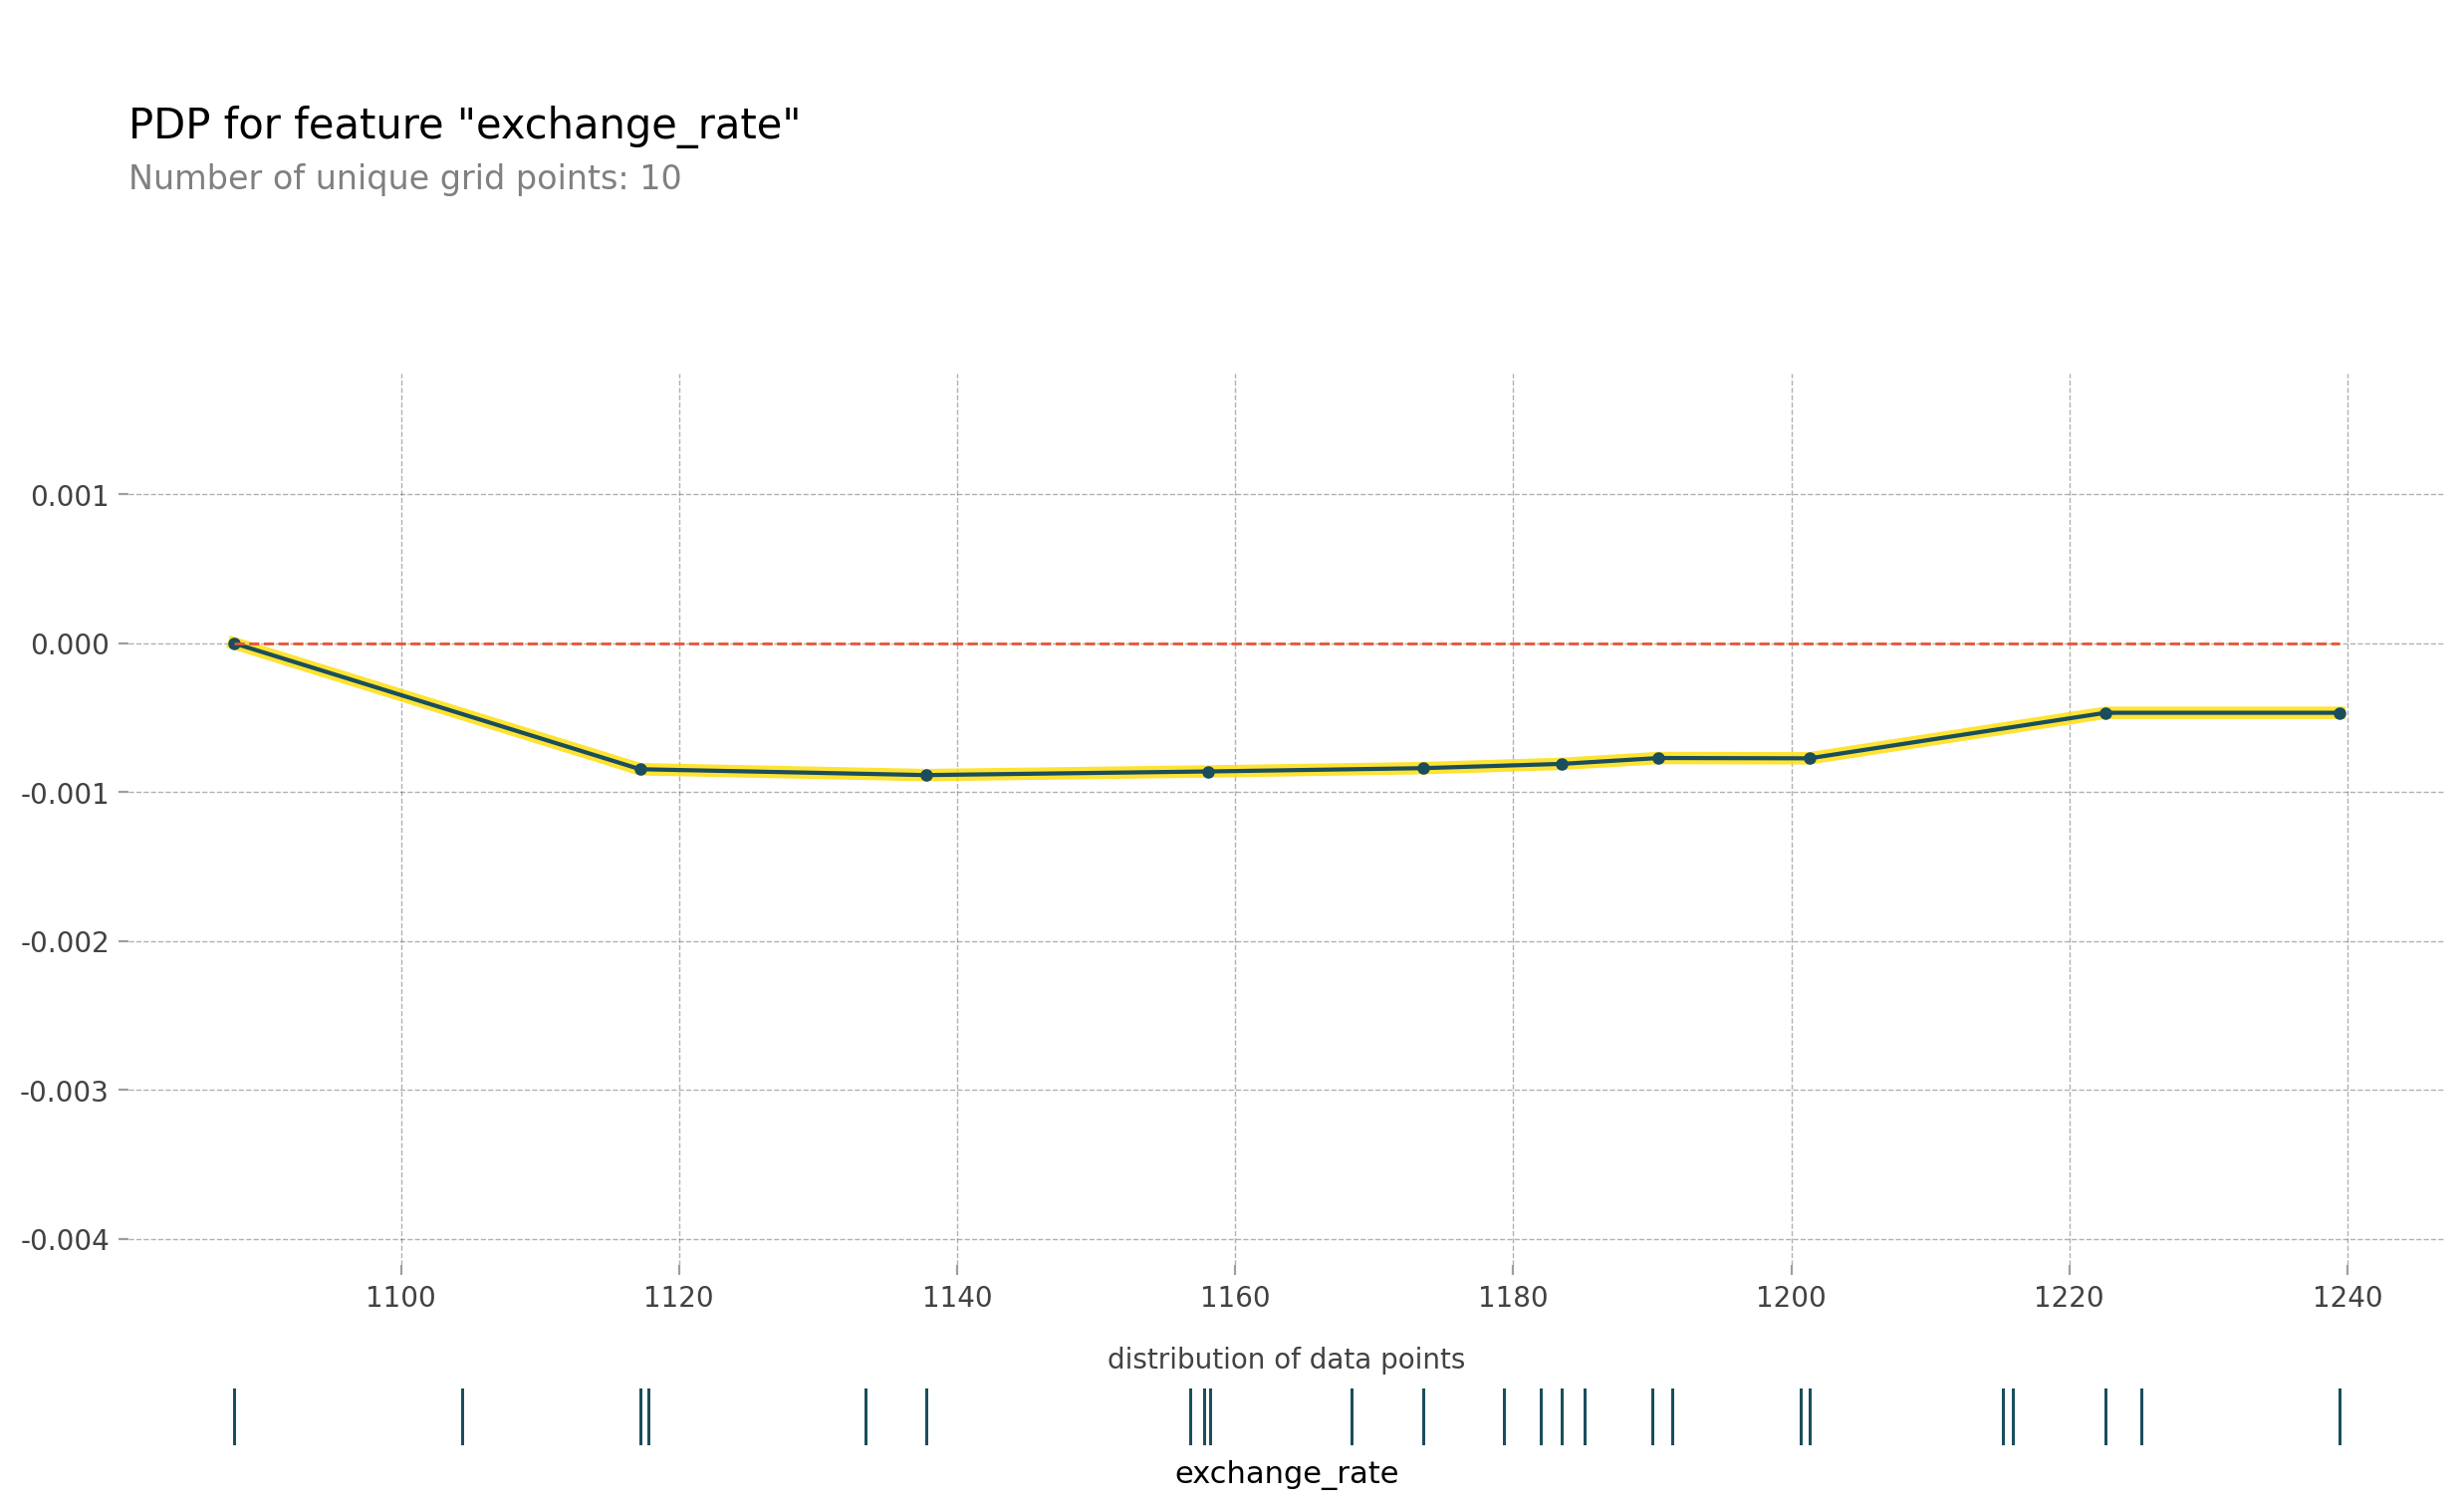

In [204]:
feature = "exchange_rate"
isolated = pdp_isolate(
    model=best_model_en, 
    dataset=X_test_encoded_en, 
    model_features=X_test_encoded_en.columns, 
    feature=feature
)

pdp_plot(isolated
         , feature_name=feature
         , plot_lines=True # ICE plots
         , frac_to_plot=0.001 # or 10 (# 10000 val set * 0.001)
         , plot_pts_dist=True)

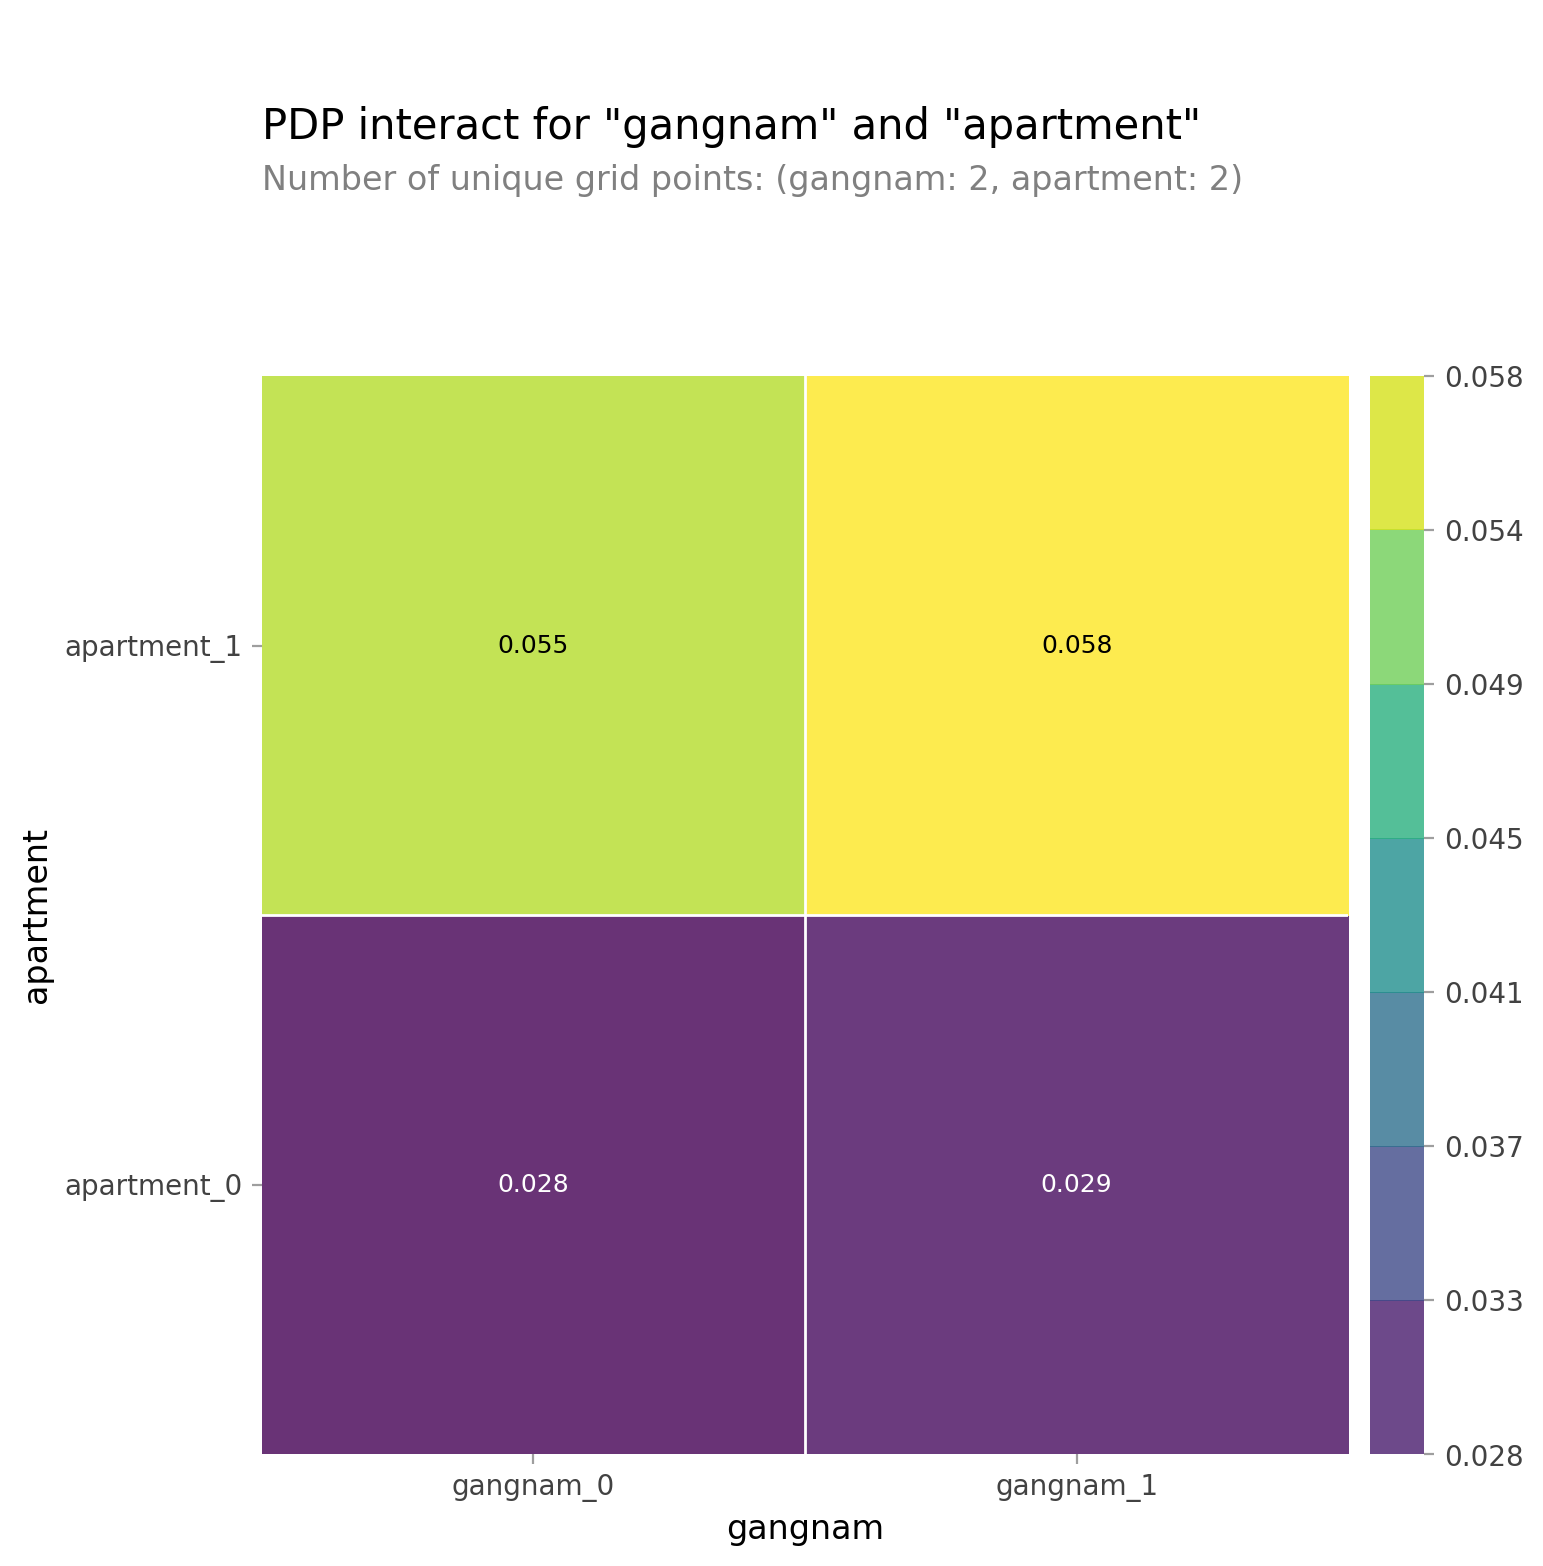

In [206]:
temp_features = ["gangnam","apartment"]
interaction = pdp_interact(
    model=best_model, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    features=temp_features
)
pdp_interact_plot(interaction, plot_type='grid', feature_names=temp_features);

##shap을 활용한 자료들

In [ ]:
#!pip install shap

In [134]:
import shap

In [163]:
num = 30
row = X_test_encoded.iloc[[num]]
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(row)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [150]:
def explain(num):
  row = X_test_encoded.iloc[[num]]
  feature_names = row.columns
  feature_values = row.values[0]
  shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

  pros = shaps.sort_values(ascending=False)[:3].index
  cons = shaps.sort_values(ascending=True)[:3].index


  print('부동산매물 예측에 대한 Positive 요인 Top 3 입니다:')
  for i, pro in enumerate(pros, start=1):
      feature_name, feature_value = pro
      print(f'{i}. {feature_name} : {feature_value}')

  print('\n')
  print('Negative 요인 Top 3 입니다:')
  for i, con in enumerate(cons, start=1):
      feature_name, feature_value = con
      print(f'{i}. {feature_name} : {feature_value}')

In [158]:
explain(30)

부동산매물 예측에 대한 Positive 요인 Top 3 입니다:
1. 정기예금금리 : 1.54
2. 종류_연립다세대 : 0.0
3. 주택담보대출금리 : 2.5


Negative 요인 Top 3 입니다:
1. 매매가격지수 : 110.008
2. 종류_종합 : 0.0
3. 가계대출대비주택대출 : 0.6019190696463836


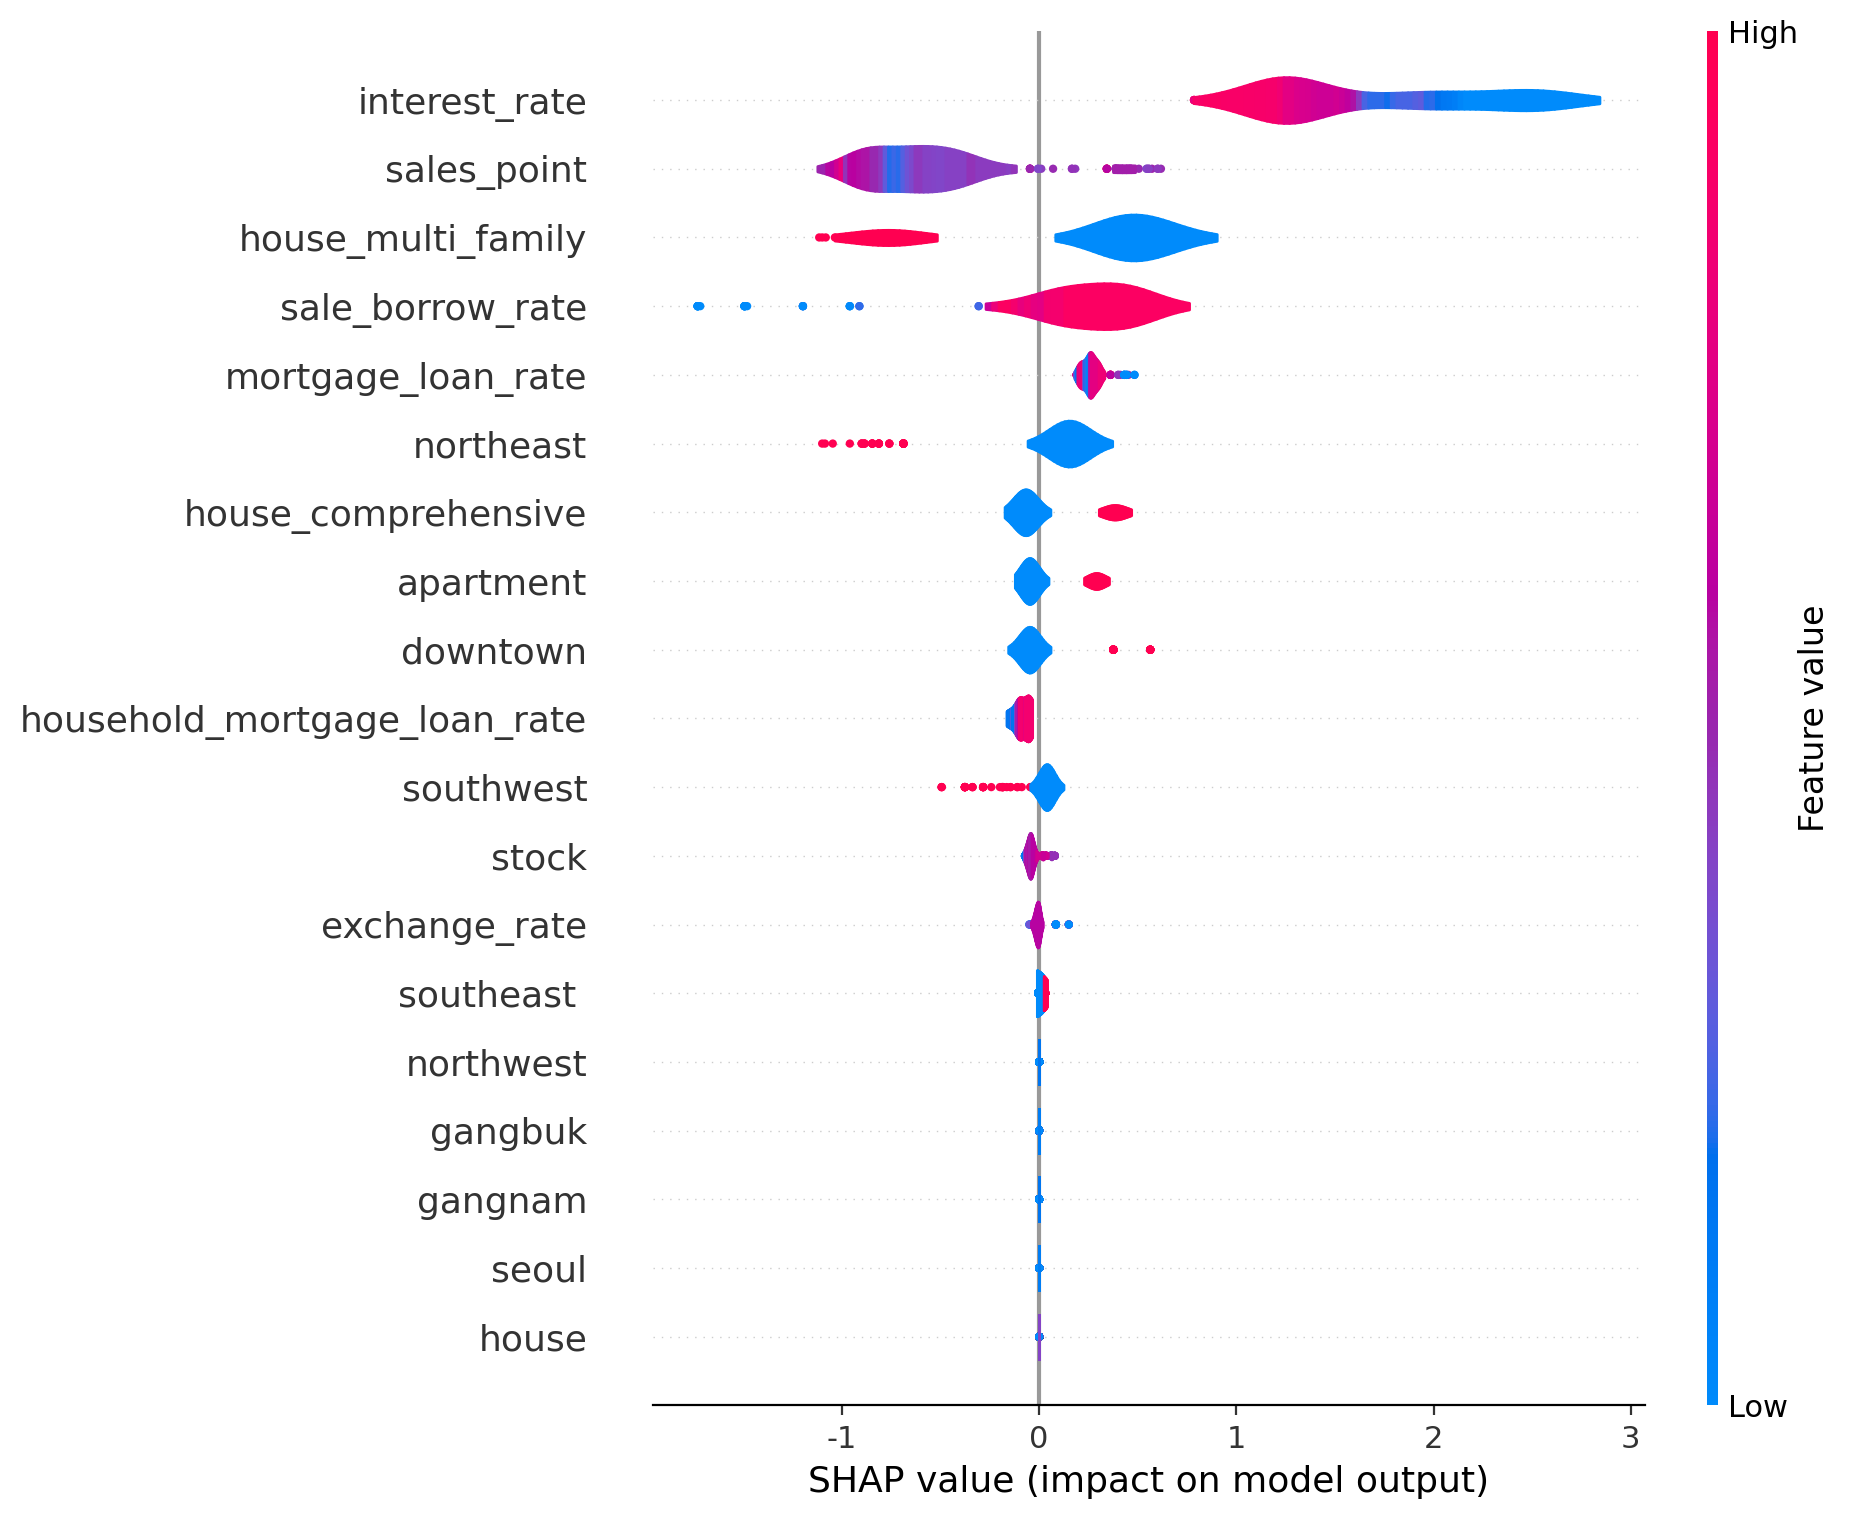

In [208]:
shap_values = explainer.shap_values(X_test_encoded_en.iloc[:300])
shap.summary_plot(shap_values, X_train_encoded_en.iloc[:300], plot_type="violin")